# Resumen de métricas de PyOD

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

Creamos csv general de etiquetado:

In [2]:
pyod = pd.read_csv('PyOD/Resultados/HBOS_completo.csv')
pyod = pyod.drop('Y_pred', axis=1)

Leemos la predicción de cada método:

In [3]:
hbos = pd.read_csv('PyOD/Resultados/HBOS_completo.csv',usecols=['Y_pred'])
iforest = pd.read_csv('PyOD/Resultados/IForest_completo.csv',usecols=['Y_pred'])
knn = pd.read_csv('PyOD/Resultados/KNN_completo.csv',usecols=['Y_pred'])
loda = pd.read_csv('PyOD/Resultados/LODA_completo.csv',usecols=['Y_pred'])
mad = pd.read_csv('PyOD/Resultados/MAD_completo.csv',usecols=['Y_pred'])
mcd = pd.read_csv('PyOD/Resultados/MCD_completo.csv',usecols=['Y_pred'])

La unimos al csv general:

In [4]:
pyod['HBOS'] = hbos['Y_pred']
pyod['IForest'] = iforest['Y_pred']
pyod['KNN'] = knn['Y_pred']
pyod['LODA'] = loda['Y_pred']
pyod['MAD'] = mad['Y_pred']
pyod['MCD'] = mcd['Y_pred']

In [5]:
pyod = pyod.set_index('fecha')

In [6]:
pyod.head()

,CurvaCola,HBOS,IForest,KNN,LODA,MAD,MCD
fecha,,,,,,,
2021-11-26 11:48:00,1,0,0,0,0,0,0
2021-06-06 19:17:00,0,0,0,0,0,1,0
2021-12-04 07:59:00,1,0,0,0,0,0,0
2021-11-06 17:55:00,1,0,0,0,0,0,0
2021-05-05 08:19:00,0,0,0,1,0,0,0


## Métricas generales:

In [7]:
anomalias = ['CurvaCola']
metodos = ['HBOS','IForest','KNN','LODA','MAD','MCD']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

metricas_generales = pd.DataFrame(index=metodos,columns=metricas)
for metodo in metodos:
    metricas_generales.loc[metodo,metricas[0]] = roc_auc_score(pyod['CurvaCola'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[1]] = accuracy_score(pyod['CurvaCola'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[2]] = precision_score(pyod['CurvaCola'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[3]] = cohen_kappa_score(pyod['CurvaCola'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[4]] = recall_score(pyod['CurvaCola'], pyod[metodo])
    metricas_generales.loc[metodo,metricas[5]] = recall_score(pyod['CurvaCola'], pyod[metodo], pos_label=0)
metricas_generales

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.50621,0.689658,0.291055,0.015438,0.111893,0.900527
IForest,0.5111,0.694128,0.310265,0.02765,0.117686,0.904515
KNN,0.50931,0.693893,0.304262,0.023277,0.112553,0.906067
LODA,0.507536,0.690952,0.296261,0.018748,0.113286,0.901785
MAD,0.496859,0.724635,0.163636,-0.009019,0.007259,0.986459
MCD,0.516269,0.698461,0.330611,0.040561,0.124652,0.907887


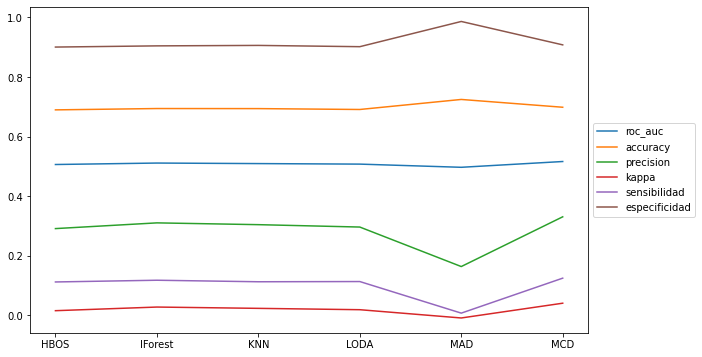

In [8]:
metricas_generales.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

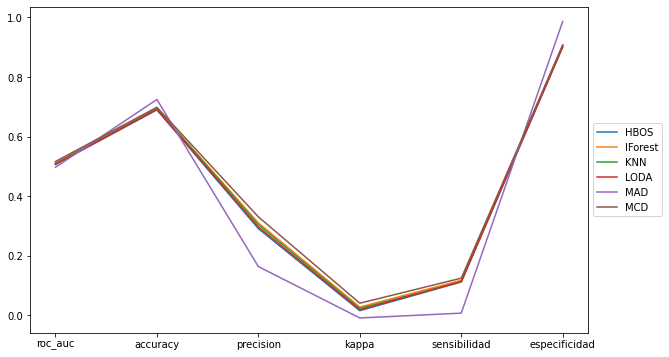

In [9]:
metricas_generales.T.plot(figsize=(10,6)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))